<a href="https://colab.research.google.com/github/jngeo/Google-Colab-Notebooks/blob/master/Example_2_kNN_and_PCA_based_compression_on_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pylab as plt
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow.contrib.eager as tfe

from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

In [0]:
import os
img_dir = '/tmp/nst'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg

In [3]:
#!ls
cwd = os.getcwd()
print(cwd)
print(img_dir)

/content
/tmp/nst


In [4]:
tf.enable_eager_execution()
print("Eager execution: {}".format(tf.executing_eagerly()))

# Set up some global values here
content_path = '/tmp/nst/Green_Sea_Turtle_grazing_seagrass.jpg'

Eager execution: True


### Import modules and packages

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

def load_img(path_to_img):
  max_dim = 512
  img = Image.open(path_to_img)
  long = max(img.size)
  scale = max_dim/long
  img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)
  
  img = kp_image.img_to_array(img)
  
  # We need to broadcast the image array such that it has a batch dimension 
  img = np.expand_dims(img, axis=0)
  return img

def imshow(img, title=None):
  # Remove the batch dimension
  out = np.squeeze(img, axis=0)
  # Normalize for display 
  out = out.astype('uint8')
  plt.imshow(out)
  if title is not None:
    plt.title(title)
  plt.imshow(out)

In [21]:
print(np.shape(img_data))

(1, 384, 512, 3)


In [22]:
img_data = np.reshape(img_data, [384, 512, 3])
print(np.shape(img_data))

(384, 512, 3)


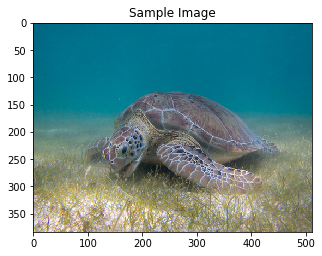

In [23]:
img_data = load_img(content_path).astype('uint8')

plt.figure(figsize=(5,5))
imshow(img_data, 'Sample Image')
plt.show()

In [24]:
print(np.shape(img_data))

(1, 384, 512, 3)


shape of img:  (1, 200, 200, 3)


<function matplotlib.pyplot.show>

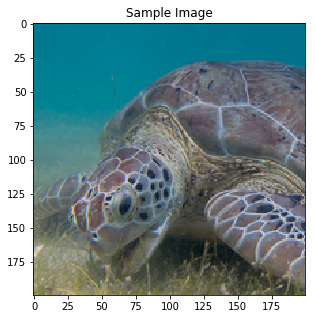

In [27]:
# crop image to smaller

img = img_data[:,100:300,100:300,:]
print('shape of img: ', np.shape(img))

plt.figure(figsize=(5,5))
imshow(img, 'Sample Image')
plt.show

### K-means Compression

In [0]:
from sklearn.cluster import KMeans
#from skimage import io

row_img = img.shape[1]
col_img = img.shape[2]

image = img.reshape(img.shape[1]*img.shape[2],3)
print('shape of image: ', np.shape(image))

### kmeans compression
kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=50, verbose = 1)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(row_img,col_img)
print('shape of labels', np.shape(labels))


In [31]:
print('shape of labels', np.shape(labels))

shape of labels (200, 200)


Reconstructed Image: k-means(k=128) compressed image


Text(0.5, 1.0, 'K-means Compressed (k=128)')

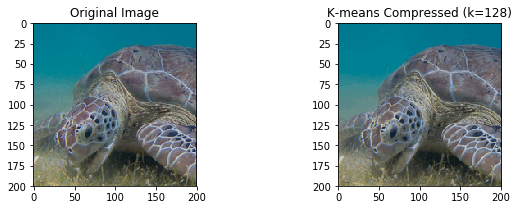

In [34]:
print('Reconstructed Image: k-means(k=128) compressed image')

dec_image = np.zeros((labels.shape[0],labels.shape[1],3),dtype=np.uint8 )
for i in range(labels.shape[1]):
    for j in range(labels.shape[1]):
            dec_image[i,j,:] = clusters[labels[i,j],:]
            
        
fig = plt.figure(figsize=(10, 3))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.imshow(np.reshape(img, [200, 200, 3]))
ax1.set_title('Original Image')

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.imshow(dec_image)
ax2.set_title('K-means Compressed (k=128)')

In [36]:
### k-means model set

kmeans_model = {}
kclusters = {}
klabels = {}
k_img_recon = {}

#image data
row_img = img.shape[1]
col_img = img.shape[2]

image = img.reshape(img.shape[1]*img.shape[2],3)
print('shape of image: ', np.shape(image))

for i in range(1,50):
    print('kmeans model: ', i)
    kmeans_model[i] = KMeans(n_clusters = i, n_init=10, max_iter=30, n_jobs = -1, verbose = 0)
    kmeans_model[i].fit(image)
    
    kclusters[i] = np.asarray(kmeans_model[i].cluster_centers_,dtype=np.uint8) 
    klabels[i] = np.asarray(kmeans_model[i].labels_,dtype=np.uint8 )  
    klabels[i] = klabels[i].reshape(row_img,col_img)
    
    #kmeans reconstructed
    k_img_recon[i] = np.zeros((klabels[i].shape[0],klabels[i].shape[1],3),dtype=np.uint8 )
    for j in range(klabels[i].shape[0]):
        for k in range(klabels[i].shape[1]):
                k_img_recon[i][j,k,:] = kclusters[i][klabels[i][j,k],:]


shape of image:  (40000, 3)
kmeans model:  1
kmeans model:  2
kmeans model:  3
kmeans model:  4
kmeans model:  5
kmeans model:  6
kmeans model:  7
kmeans model:  8
kmeans model:  9
kmeans model:  10
kmeans model:  11
kmeans model:  12
kmeans model:  13
kmeans model:  14
kmeans model:  15
kmeans model:  16
kmeans model:  17
kmeans model:  18
kmeans model:  19
kmeans model:  20
kmeans model:  21
kmeans model:  22
kmeans model:  23
kmeans model:  24
kmeans model:  25
kmeans model:  26
kmeans model:  27
kmeans model:  28
kmeans model:  29
kmeans model:  30
kmeans model:  31
kmeans model:  32
kmeans model:  33
kmeans model:  34
kmeans model:  35
kmeans model:  36
kmeans model:  37
kmeans model:  38
kmeans model:  39
kmeans model:  40
kmeans model:  41
kmeans model:  42
kmeans model:  43
kmeans model:  44
kmeans model:  45
kmeans model:  46
kmeans model:  47
kmeans model:  48
kmeans model:  49


We created 50 k-means model with clusters k=1 up to k=50.
We want to check the effect on the image compression based on the selected K.

Text(0.5, 1.0, 'K-means Compressed (k=5)')

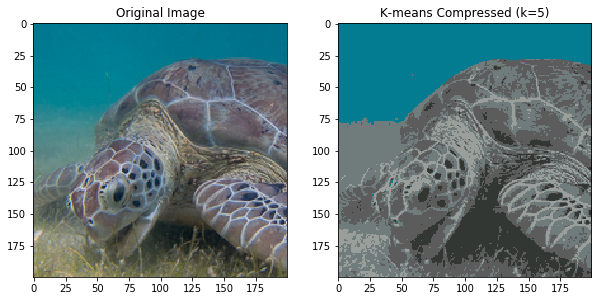

In [53]:
#### change k to visualize different compressions
k = 5

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.imshow(np.reshape(img, [200, 200, 3]))
ax1.set_title('Original Image')

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.imshow(k_img_recon[k])
title_text = str('K-means Compressed (k=' + str(k) + ')')
ax2.set_title(title_text)


Text(0.5, 1.0, 'K-means Compressed (k=40)')

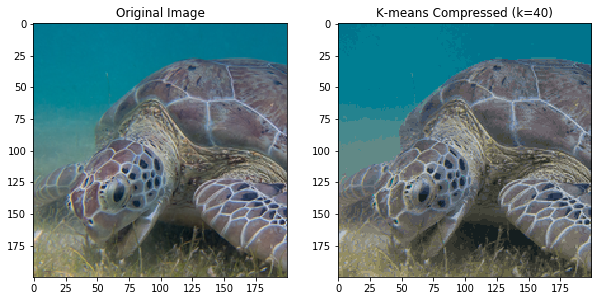

In [54]:
#### change k to visualize different compressions
k = 40

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.imshow(np.reshape(img, [200, 200, 3]))
ax1.set_title('Original Image')

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.imshow(k_img_recon[k])
title_text = str('K-means Compressed (k=' + str(k) + ')')
ax2.set_title(title_text)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


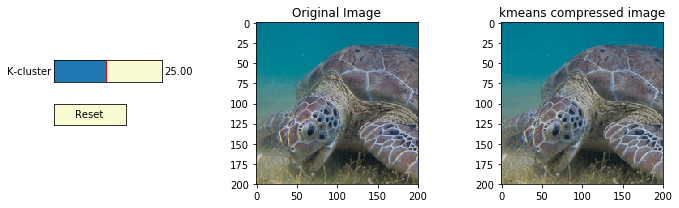

In [50]:
#turn on widgets, unfortunately, matplotlib.widgets is currently not supported in Colab
#run this in your local machine, and you should be able to 

#%matplotlib notebook
%matplotlib inline

from matplotlib.widgets import Slider, Button, RadioButtons

kmax = 50
k0 = int(np.round(kmax/2))
delta_k = 1
ims = []

fig = plt.figure(figsize=(10, 3))

#ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=1)
### create slider to control num_dim
axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.1, 0.6, 0.15, 0.1], facecolor=axcolor)
sfreq = Slider(axfreq, 'K-cluster', 1, kmax, valinit=k0, valstep=delta_k)
### create reset button
resetax = plt.axes([0.1, 0.4, 0.1, 0.1])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=1)
ax2.set_title('Original Image')
img2 = ax2.imshow(np.reshape(img, [200, 200, 3]))

ax3 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax3.set_title('kmeans compressed image')
img3 = ax3.imshow(dec_image)


def reset(event):
    sfreq.reset()
button.on_clicked(reset)

def update(val):
    kdim = sfreq.val
    img3.set_data(k_img_recon[kdim])
    fig.canvas.draw()
    
sfreq.on_changed(update)

fig.tight_layout()
plt.show()

### PCA-based Compression

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_components = 2
pca = PCA(n_components=pca_components)

### img data
print('shape of img: ', np.shape(img))

#image data
row_img = img.shape[1]
col_img = img.shape[2]
image = img.reshape(img.shape[1]*img.shape[2],3)
print('shape of image: ', np.shape(image))

### normalize/standardize
scx = StandardScaler()
image_norm = scx.fit_transform(image)
#image_norm = image
print('shape of image_norm: ', np.shape(image_norm))

### pca
image_pca = pca.fit_transform(image_norm)
#image_pca = pca.fit_transform(image)
#Lower dimension data is 150000x1 instead of 5000x3
image_pca.shape

shape of img:  (1, 200, 200, 3)
shape of image:  (40000, 3)
shape of image_norm:  (40000, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(40000, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape of image_pca_recon:  (40000, 3)
shape of image_pca_recon:  (200, 200, 3)


Text(0.5, 1.0, 'PCA Compressed Image')

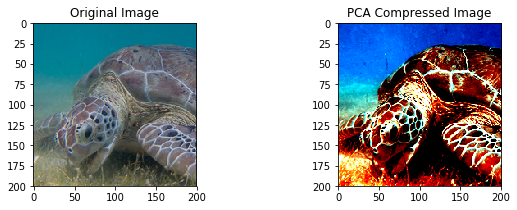

In [60]:
#pca reconstructed
image_pca_recon = pca.inverse_transform(image_pca)
print('shape of image_pca_recon: ', np.shape(image_pca_recon))

# unnormalize back
#image_pca_recon = scx.inverse_transform(image_pca_recon)
#print('shape of image_pca_recon: ', np.shape(image_pca_recon))

#Reshape image_pca_recon to 300x500x3 to display images
image_pca_recon = image_pca_recon.reshape((row_img,col_img,3))
print('shape of image_pca_recon: ', np.shape(image_pca_recon))

fig = plt.figure(figsize=(10, 3))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.imshow(np.reshape(img, [200, 200, 3]))
ax1.set_title('Original Image')

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.imshow(image_pca_recon)
ax2.set_title('PCA Compressed Image')

In [62]:
### create multiple pca models with different dimensions

### img data
row_img = img.shape[1]
col_img = img.shape[2]
#image = img.reshape(img.shape[1]*img.shape[2],3)
image = img.reshape(img.shape[1]*3,img.shape[2])
print('shape of image: ', np.shape(image))

### normalize/standardize
scx = StandardScaler()
image_norm = scx.fit_transform(image)
print('shape of image_norm: ', np.shape(image_norm))

### pca
image_pca = pca.fit_transform(image_norm)

pca_set = {}
image_pca_set = {}
image_pcarecon_set = {}
n_comp = 200

for i in range(n_comp):
    pca_set[i+1] = PCA(n_components=i+1)
    image_pca_set[i+1] = pca_set[i+1].fit_transform(image_norm)
    
    #pca reconstructed
    image_pcarecon_set[i+1] = pca_set[i+1].inverse_transform(image_pca_set[i+1])

    #Reshape image_pca_recon to 300x500x3 to display images
    image_pcarecon_set[i+1] = image_pcarecon_set[i+1].reshape((row_img,col_img,3))
    #print('shape of image_pcarecon_set[', i+1, ']: ', np.shape(image_pcarecon_set[i+1]))


shape of image:  (600, 200)
shape of image_norm:  (600, 200)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'PCA Compressed Image')

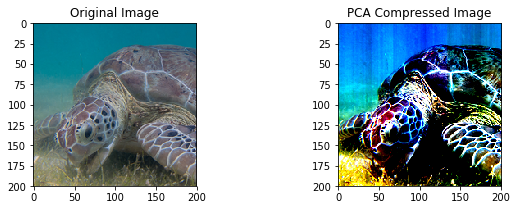

In [66]:
fig = plt.figure(figsize=(10, 3))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.imshow(np.reshape(img, [200, 200, 3]))
ax1.set_title('Original Image')

k= 200
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.imshow(image_pcarecon_set[k])
ax2.set_title('PCA Compressed Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


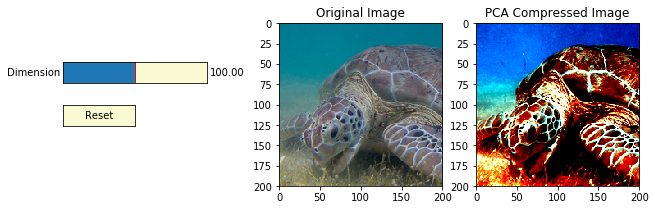

In [67]:
#turn on widgets, unfortunately, matplotlib.widgets is currently not supported in Colab
#run this in your local machine, and you should be able to 

#%matplotlib notebook
%matplotlib inline


from matplotlib.widgets import Slider, Button, RadioButtons

f0 = int(np.round(n_comp/2))
delta_f = 1
ims = []

fig = plt.figure(figsize=(10, 3))

#ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=1)
### create slider to control num_dim
axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.1, 0.6, 0.2, 0.1], facecolor=axcolor)
sfreq = Slider(axfreq, 'Dimension', 1, n_comp, valinit=f0, valstep=delta_f)
### create reset button
resetax = plt.axes([0.1, 0.4, 0.1, 0.1])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=1)
ax2.set_title('Original Image')
img2 = ax2.imshow(np.reshape(img, [200, 200, 3]))
#fig.colorbar(img2)

ax3 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax3.set_title('PCA Compressed Image')
img3 = ax3.imshow(image_pca_recon)
#fig.colorbar(img3)


def reset(event):
    sfreq.reset()
button.on_clicked(reset)

def update(val):
    dim = sfreq.val
    img3.set_data(image_pcarecon_set[dim])
    #if dim %5 == 0:
    #    #img3.imshow(image_pca_recon)
    #    img3.set_data(image_pca_recon)
    #else:
    #    #img3.imshow(image)
    #    img3.set_data(img)
    #fig.canvas.draw_idle()
    fig.canvas.draw()
    
sfreq.on_changed(update)

plt.show()